In [28]:
import os

In [91]:
from skimage import io
from skimage.filters import sobel
from skimage.color import rgb2gray
from skimage.feature import CENSURE
import matplotlib.pyplot as plt

In [49]:
%matplotlib inline

In [50]:
path_dataset = 'mednode_dataset/'

In [51]:
etiquetas = os.listdir(path_dataset)

In [52]:
etiquetas

['melanoma', 'naevus']

In [70]:
etiqueta_0 = os.path.join(path_dataset, etiquetas[0])

In [71]:
etiqueta_1 = os.path.join(path_dataset, etiquetas[1])

In [72]:
imgs_etiqueta_0 = os.listdir(etiqueta_0)

In [73]:
imgs_etiqueta_1 = os.listdir(etiqueta_1)

In [74]:
def show_imgs(etiqueta, imgs_etiquetas):
    for img in imgs_etiquetas:
        path_img = os.path.join(etiqueta, img)
        print(f'{path_img}')
        image = io.imread(path_img)
        plt.title(f'{img}')
        plt.imshow(image)
        plt.tight_layout()
        plt.axis('off')
        plt.show()

In [150]:
# show_imgs(etiqueta_0, imgs_etiqueta_0)

In [149]:
# show_imgs(etiqueta_1, imgs_etiqueta_1)

In [88]:
def show_imgs_grays(etiqueta, imgs_etiquetas):
    for img in imgs_etiquetas:
        path_img = os.path.join(etiqueta, img)
        print(f'{path_img}')
        image = io.imread(path_img)
        image = rgb2gray(image)
        plt.title(f'{img}')
        plt.imshow(image, cmap='gray')
        plt.tight_layout()
        plt.axis('off')
        plt.show()

In [148]:
# show_imgs_grays(etiqueta_0, imgs_etiqueta_0)

In [92]:
def show_imgs_grays_sobel(etiqueta, imgs_etiquetas):
    for img in imgs_etiquetas:
        path_img = os.path.join(etiqueta, img)
        print(f'{path_img}')
        image = io.imread(path_img)
        image = rgb2gray(image)
        image = sobel(image)
        plt.title(f'{img}')
        plt.imshow(image, cmap='gray')
        plt.tight_layout()
        plt.axis('off')
        plt.show()

In [147]:
# show_imgs_grays_sobel(etiqueta_0, imgs_etiqueta_0)

In [113]:
def show_imgs_keypoints(etiqueta, imgs_etiquetas):
    # keypoints = {}
    for img in imgs_etiquetas:
        path_img = os.path.join(etiqueta, img)
        print(f'{path_img}')
        image = io.imread(path_img)
        image = rgb2gray(image)
        censure = CENSURE(min_scale=1, max_scale=10)
        censure.detect(image)
       # keypoints[img] = censure.keypoints
        plt.title(f'{img}')
        plt.imshow(image, cmap='gray')
        plt.scatter(censure.keypoints[:, 1], censure.keypoints[:, 0],
              2 ** censure.scales, facecolors='none', edgecolors='r')
        plt.tight_layout()
        plt.axis('off')
        plt.show()
        break
    # return keypoints

In [146]:
# show_imgs_keypoints(etiqueta_0, imgs_etiqueta_0)

In [153]:
from scipy.stats import entropy

In [156]:
def show_imgs_keypoints_features(etiqueta, imgs_etiquetas):
    features = {}
    for img in imgs_etiquetas:
        path_img = os.path.join(etiqueta, img)
        print(f'{path_img}')
        image = io.imread(path_img)
        image = rgb2gray(image)
        censure = CENSURE(min_scale=1, max_scale=10)
        censure.detect(image)
        features[img] = {}
        for kp in censure.keypoints:
            crop = image[kp[0]-3:kp[0]+4, kp[1]-3:kp[1]+4].copy()
            features[img][f'{kp[0]}-{kp[1]}-3'] = [
                crop.sum(),
                crop.min(),
                crop.max(),
                crop.mean(),
                crop.std(),
                entropy(crop.ravel())
            ]
        plt.title(f'{img}')
        plt.imshow(image, cmap='gray')
        plt.scatter(censure.keypoints[:, 1], censure.keypoints[:, 0],
              2 ** 1, facecolors='none', edgecolors='r')
        plt.tight_layout()
        plt.axis('off')
        plt.show()
        break
    return features

mednode_dataset/melanoma\154372.jpg


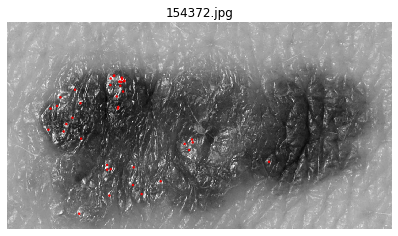

In [158]:
features = show_imgs_keypoints_features(etiqueta_0, imgs_etiqueta_0)

In [159]:
features

{'154372.jpg': {'252-507-3': [21.02936,
   0.3839678431372549,
   0.5011247058823529,
   0.42917061224489794,
   0.029560398563851332,
   3.8894781707635517],
  '253-505-3': [21.88578784313726,
   0.389861568627451,
   0.5445674509803922,
   0.4466487314925971,
   0.039694407606898206,
   3.8879227647753667],
  '262-543-3': [19.269100784313725,
   0.35575882352941174,
   0.5071007843137255,
   0.39324695478191274,
   0.028606540872974366,
   3.8892520441487988],
  '265-544-3': [20.30179843137255,
   0.35575882352941174,
   0.637666274509804,
   0.41432241696678673,
   0.059844857998068594,
   3.882185445252531],
  '266-490-3': [36.67289764705882,
   0.5422101960784314,
   0.965724705882353,
   0.7484264825930371,
   0.09985394707379369,
   3.882895340331637],
  '267-544-3': [22.799694509803924,
   0.35575882352941174,
   0.7158298039215686,
   0.4652998879551821,
   0.09789477224812883,
   3.8707830346418386],
  '276-555-3': [20.38502156862745,
   0.3221086274509804,
   0.7853474509803